<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Autoregression-modelling-of-Time-series-for-Outlier-detection" data-toc-modified-id="Autoregression-modelling-of-Time-series-for-Outlier-detection-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Autoregression modelling of Time series for Outlier detection</a></span></li><li><span><a href="#Persistence-Model" data-toc-modified-id="Persistence-Model-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Persistence Model</a></span></li><li><span><a href="#AutoRegression-model" data-toc-modified-id="AutoRegression-model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>AutoRegression model</a></span><ul class="toc-item"><li><span><a href="#Auto-Correlation-at-lag-=-k" data-toc-modified-id="Auto-Correlation-at-lag-=-k-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Auto Correlation at lag = k</a></span></li></ul></li><li><span><a href="#Get-all-anomalies" data-toc-modified-id="Get-all-anomalies-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Get all anomalies</a></span></li><li><span><a href="#Using-AR-to-model-whole-TS" data-toc-modified-id="Using-AR-to-model-whole-TS-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Using AR to model whole TS</a></span></li><li><span><a href="#Determine-Seasonality" data-toc-modified-id="Determine-Seasonality-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Determine Seasonality</a></span></li><li><span><a href="#Stationarize-Time-Series-acc-to-Seasonality" data-toc-modified-id="Stationarize-Time-Series-acc-to-Seasonality-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Stationarize Time Series acc to Seasonality</a></span></li><li><span><a href="#Test-Stationarity-using-the-Augmented-Dicky-Fuller-Test" data-toc-modified-id="Test-Stationarity-using-the-Augmented-Dicky-Fuller-Test-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Test Stationarity using the Augmented Dicky Fuller Test</a></span></li><li><span><a href="#Define-threshold" data-toc-modified-id="Define-threshold-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Define threshold</a></span></li><li><span><a href="#See-if-AR-model-+-threshold-=-Anomalies" data-toc-modified-id="See-if-AR-model-+-threshold-=-Anomalies-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>See if AR model + threshold = Anomalies</a></span></li><li><span><a href="#Calculate-F1-score" data-toc-modified-id="Calculate-F1-score-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Calculate F1 score</a></span></li></ul></div>

# Autoregression modelling of Time series for Outlier detection 
By Sanket Mehrotra

Source Ref: https://machinelearningmastery.com/autoregression-models-time-series-forecasting-python/

A regression model provides an output based on a linear combination of input values
$$
\hat{y} = b_0 + b_1*X_1
$$

an AR model assumes autocorrelation

The stronger the correlation between the output variable and a specific lagged variable, the **more weight** that autoregression model can put on that variable when modeling.

In [1]:
import os
os.getcwd()

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt 
from sklearn.metrics import mean_squared_error
import numpy as np

In [3]:
series = pd.read_csv('D://Temp/time-series/data/yahoo/dataset/ydata-labeled-time-series-anomalies-v1_0/A2Benchmark/synthetic_1.csv')

print(series.head())

    timestamp       value  is_anomaly
0  1416726000   13.894031           0
1  1416729600   33.578274           0
2  1416733200   88.933746           0
3  1416736800  125.389424           0
4  1416740400  152.962000           0


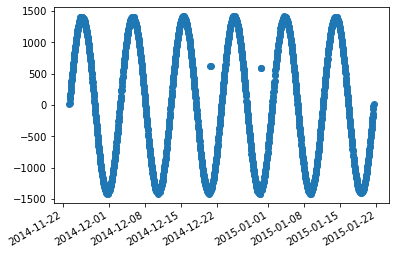

In [4]:
series['timestamp'] = pd.to_datetime(series['timestamp'],unit='s')#format='%f' if formatting required upto nanoseconds
plt.plot_date(series['timestamp'],series['value'])
plt.gcf().autofmt_xdate()

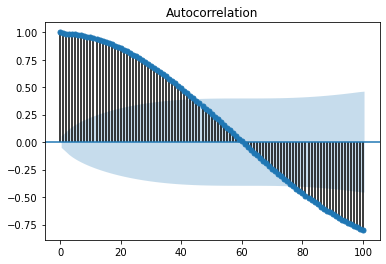

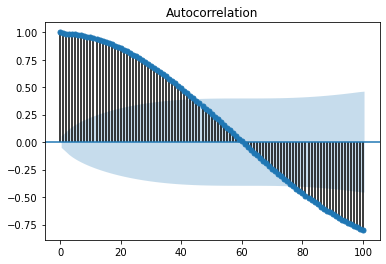

In [5]:
from statsmodels.graphics.tsaplots import plot_acf
#series = pd.read_csv('D://Temp/time-series/data/yahoo/dataset/ydata-labeled-time-series-anomalies-v1_0/A2Benchmark/synthetic_1.csv')
plot_acf(series['value'], lags=100)
#plt.clf()

In [6]:
df_indexed = series.copy().set_index('timestamp')

In [7]:
# create lagged dataset
values = pd.DataFrame(series.value)
lagged_df = pd.concat([values.shift(1),values],axis =1)
print("df\n",lagged_df.head())
lagged_df.columns = ['t-1','t']
result = lagged_df.corr()
print("Correlation Matrix Result for lag = 1: ", "\n" ,result)


df
         value       value
0         NaN   13.894031
1   13.894031   33.578274
2   33.578274   88.933746
3   88.933746  125.389424
4  125.389424  152.962000
Correlation Matrix Result for lag = 1:  
           t-1         t
t-1  1.000000  0.993903
t    0.993903  1.000000


In [8]:
# split into train and test sets
X = lagged_df.values
print("X","\n",X)
train, test = X[1:len(X)-7], X[len(X)-7:]
print("\ntrain\n",train,"\ntest\n",test)
train_X, train_y = train[:,0], train[:,1]
print("\ntrainX\n",train_X,"\ntrain_y\n",train_y)
test_X, test_y = test[:,0], test[:,1]
print("\ntestX\n",test_X,"\ntest_y\n",test_y)

X 
 [[          nan   13.8940312 ]
 [  13.8940312    33.57827355]
 [  33.57827355   88.93374618]
 ...
 [-139.65783427  -70.55065181]
 [ -70.55065181  -16.85714756]
 [ -16.85714756    7.75765952]]

train
 [[  13.8940312    33.57827355]
 [  33.57827355   88.93374618]
 [  88.93374618  125.3894237 ]
 ...
 [-378.74044506 -340.50852173]
 [-340.50852173 -292.65126129]
 [-292.65126129 -251.27630666]] 
test
 [[-251.27630666 -201.52864723]
 [-201.52864723 -187.47196836]
 [-187.47196836 -141.4197665 ]
 [-141.4197665  -139.65783427]
 [-139.65783427  -70.55065181]
 [ -70.55065181  -16.85714756]
 [ -16.85714756    7.75765952]]

trainX
 [  13.8940312    33.57827355   88.93374618 ... -378.74044506 -340.50852173
 -292.65126129] 
train_y
 [  33.57827355   88.93374618  125.3894237  ... -340.50852173 -292.65126129
 -251.27630666]

testX
 [-251.27630666 -201.52864723 -187.47196836 -141.4197665  -139.65783427
  -70.55065181  -16.85714756] 
test_y
 [-201.52864723 -187.47196836 -141.4197665  -139.65783427  -7

# Persistence Model

Test MSE: 1865.859


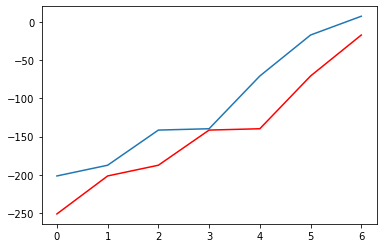

In [9]:
#Persistence Model
def model_persistence(x):
	return x

# walk-forward validation
predictions = list()
for x in test_X:
	yhat = model_persistence(x)
	predictions.append(yhat)
test_score = mean_squared_error(test_y, predictions)
print('Test MSE: %.3f' % test_score)
# plot predictions vs expected
fig1 = plt.figure()
plt.plot(test_y)
plt.plot(predictions, color='red')
plt.show()

# AutoRegression model

In [10]:
from statsmodels.tsa.ar_model import AutoReg

#Load the series
#series = pd.read_csv('D://Temp/time-series/data/yahoo/dataset/ydata-labeled-time-series-anomalies-v1_0/A2Benchmark/synthetic_1.csv')
series = pd.read_csv('D://Temp/time-series/data/yahoo-mutated/A2/synthetic_1_value_M2.csv')

In [11]:
# split dataset
X = series.value
train, test = X[1:len(X)-20], X[len(X)-20:]

In [12]:
# train autoregression
model = AutoReg(train, lags=31)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)

Coefficients: intercept    3.294900
value.L1     1.008510
value.L2    -0.304777
value.L3     0.309467
value.L4    -0.083403
value.L5     0.082144
value.L6    -0.013783
value.L7     0.022325
value.L8    -0.003608
value.L9    -0.001827
value.L10    0.014466
value.L11   -0.008859
value.L12    0.002838
value.L13   -0.003872
value.L14    0.002262
value.L15   -0.004177
value.L16    0.005071
value.L17   -0.002992
value.L18    0.000431
value.L19    0.005712
value.L20   -0.008017
value.L21    0.003559
value.L22    0.002808
value.L23   -0.005515
value.L24   -0.002591
value.L25    0.005358
value.L26   -0.003214
value.L27   -0.003940
value.L28    0.001268
value.L29   -0.009003
value.L30   -0.004923
value.L31   -0.020971
dtype: float64


In [13]:
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
predictions = predictions.replace(np.nan,0)
for i in range(len(predictions)):
 	print('predicted=%f, expected=%f' % (predictions.iloc[i], test.iloc[i]))


predicted=1225.164109, expected=1235.675464
predicted=1207.872002, expected=1214.292346
predicted=1188.810310, expected=1203.992032
predicted=1169.979917, expected=1193.921030
predicted=1150.827075, expected=1175.248490
predicted=1131.802930, expected=1140.133179
predicted=1111.390399, expected=1107.399957
predicted=1091.264759, expected=1105.250352
predicted=1070.622250, expected=1080.973567
predicted=1049.575855, expected=1038.521562
predicted=1027.749959, expected=1008.264778
predicted=1006.404843, expected=992.600101
predicted=984.454484, expected=971.327344
predicted=961.970539, expected=937.683459
predicted=939.543946, expected=900.815630
predicted=916.949845, expected=874.421670
predicted=894.753660, expected=863.603996
predicted=871.044997, expected=832.340474
predicted=847.501075, expected=798.155829
predicted=0.000000, expected=756.312359


In [14]:
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 170.824


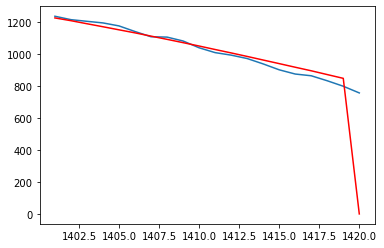

In [15]:
#plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

## Auto Correlation at lag = k 

Calculate the Pearson Correlation coefficient for different lags to see how that varies.

In [16]:
values = pd.DataFrame(series.value)
values

,value
0,13.894031
1,33.578274
2,88.933746
3,125.389424
4,152.962000
...,...
1416,874.421670
1417,863.603996
1418,832.340474
1419,798.155829


In [17]:
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
predictions = predictions.replace(np.nan,0)

Lag : 0

Test RMSE: 170.82369157849405
     t-0    t
t-0  1.0  1.0
t    1.0  1.0



Lag : 1

Test RMSE: 170.82369157849405
          t-1         t
t-1  1.000000  0.990448
t    0.990448  1.000000



Lag : 2

Test RMSE: 170.82369157849405
          t-2         t
t-2  1.000000  0.980396
t    0.980396  1.000000



Lag : 3

Test RMSE: 170.82369157849405
          t-3         t
t-3  1.000000  0.975087
t    0.975087  1.000000



Lag : 4

Test RMSE: 170.82369157849405
          t-4         t
t-4  1.000000  0.969238
t    0.969238  1.000000



Lag : 5

Test RMSE: 170.82369157849405
          t-5         t
t-5  1.000000  0.962735
t    0.962735  1.000000



Lag : 6

Test RMSE: 170.82369157849405
         t-6        t
t-6  1.00000  0.95581
t    0.95581  1.00000



Lag : 7

Test RMSE: 170.82369157849405
          t-7         t
t-7  1.000000  0.948306
t    0.948306  1.000000



Lag : 8

Test RMSE: 170.82369157849405
         t-8        t
t-8  1.00000  0.94017
t    0.94017  1.00000



Lag : 9

Test RM

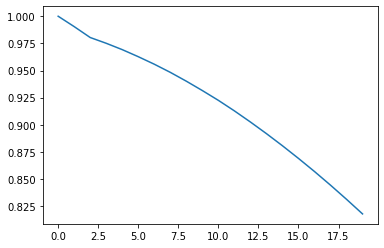

In [18]:
##Plot a list of Autocorrelation vs Values at lags
autocorr = []
for lag in range(0,20):
    print("Lag : " + str(lag) + "\n")
    rmse = sqrt(mean_squared_error(test[:len(predictions)],predictions))
    print(f"Test RMSE: {rmse}")
    df = pd.concat([values.shift(lag),values],axis =1)
    df.columns = ['t-'+str(lag),'t']
    result = df.corr()
    autocorr.append(result.t[0])
    print(result)
    print("\n\n")
    
plt.plot([i for i in (autocorr)])

# Get all anomalies

In [19]:
##Get all anomalies
serAnomaly = series[series.is_anomaly == 1]
insAnomaly = pd.read_csv('D://Temp/time-series/data/yahoo-mutated/A2/synthetic_1_value_M2_outliers.csv')

# allAnomaly = insAnomaly.set_index('timestamp').join(serAnomaly.set_index('timestamp'),on='timestamp',lsuffix="inserted",rsuffix="original")
allAnomaly = insAnomaly.join(serAnomaly.set_index('timestamp'),on='timestamp',lsuffix="inserted",rsuffix="original",how='outer')


In [20]:
allAnomaly

,timestamp,value,is_anomaly
0.0,1418965200,NaN,NaN
1.0,1418968800,NaN,NaN
2.0,1418972400,NaN,NaN
3.0,1418976000,NaN,NaN
4.0,1418979600,NaN,NaN
...,...,...,...
137.0,1419458400,NaN,NaN
138.0,1419462000,NaN,NaN
139.0,1419465600,NaN,NaN
NaN,1419940800,1270.928129,1.0


# Using AR to model whole TS

I'm planning on doing this by fitting the model on a TS, then running forecast/predict with the index arguments from 0 -> train + test

Of all the mutated datasets M1 - M5, The original series, M1 and M2 and M3 may be suitable for testing, I don't get M4 and M5 may overwhelm the results.

In [21]:
series = pd.read_csv('D://Temp/time-series/data/yahoo/dataset/ydata-labeled-time-series-anomalies-v1_0/A2Benchmark/synthetic_1.csv')
series.head()

,timestamp,value,is_anomaly
0,1416726000,13.894031,0
1,1416729600,33.578274,0
2,1416733200,88.933746,0
3,1416736800,125.389424,0
4,1416740400,152.962000,0


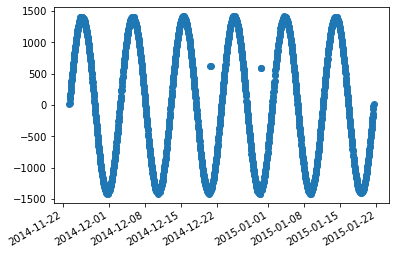

In [22]:
series['timestamp'] = pd.to_datetime(series['timestamp'],unit='s')#format='%f' if formatting required upto nanoseconds
plt.plot_date(series['timestamp'],series['value'])
plt.gcf().autofmt_xdate()

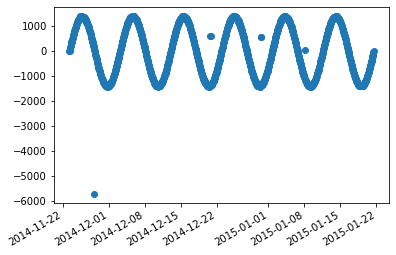

In [23]:
s1 = pd.read_csv('D://Temp/time-series/data/yahoo-mutated/A2/synthetic_1_value_M1.csv')
s1.head()
s1['timestamp'] = pd.to_datetime(s1['timestamp'],unit='s')#format='%f' if formatting required upto nanoseconds
plt.plot_date(s1['timestamp'],s1['value'])
plt.gcf().autofmt_xdate()

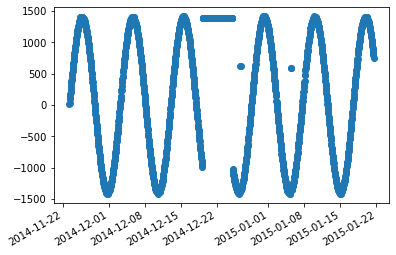

In [24]:
s2 = pd.read_csv('D://Temp/time-series/data/yahoo-mutated/A2/synthetic_1_value_M2.csv')
s2.head()
s2['timestamp'] = pd.to_datetime(s2['timestamp'],unit='s')#format='%f' if formatting required upto nanoseconds
plt.plot_date(s2['timestamp'],s2['value'])
plt.gcf().autofmt_xdate()

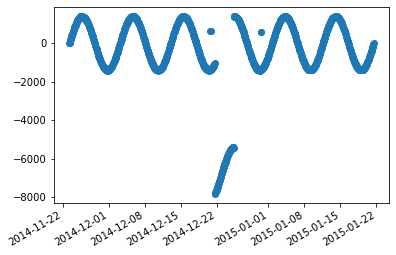

In [25]:
s3 = pd.read_csv('D://Temp/time-series/data/yahoo-mutated/A2/synthetic_1_value_M3.csv')
s3.head()
s3['timestamp'] = pd.to_datetime(s3['timestamp'],unit='s')#format='%f' if formatting required upto nanoseconds
plt.plot_date(s3['timestamp'],s3['value'])
plt.gcf().autofmt_xdate()

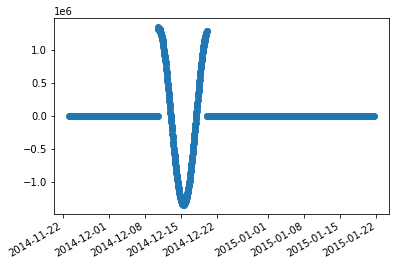

In [26]:
s4 = pd.read_csv('D://Temp/time-series/data/yahoo-mutated/A2/synthetic_1_value_M4.csv')
s4.head()
s4['timestamp'] = pd.to_datetime(s4['timestamp'],unit='s')#format='%f' if formatting required upto nanoseconds
plt.plot_date(s4['timestamp'],s4['value'])
plt.gcf().autofmt_xdate()

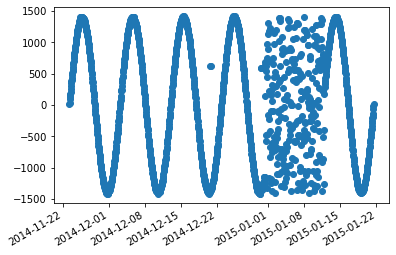

In [27]:
s5 = pd.read_csv('D://Temp/time-series/data/yahoo-mutated/A2/synthetic_1_value_M5.csv')
s5.head()
s5['timestamp'] = pd.to_datetime(s5['timestamp'],unit='s')#format='%f' if formatting required upto nanoseconds
plt.plot_date(s5['timestamp'],s5['value'])
plt.gcf().autofmt_xdate()

In [28]:
# split dataset
X = series.value
train, test = X[1:len(X)//2], X[1:len(X)]

The above line is training the AR model on half the series and testing it on the whole series.

In [29]:
from statsmodels.tsa.ar_model import AutoReg
# train autoregression
model = AutoReg(train, lags=30)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)

Coefficients: intercept    0.018254
value.L1     0.983185
value.L2    -0.727464
value.L3     0.723140
value.L4    -0.505198
value.L5     0.522267
value.L6    -0.345715
value.L7     0.388206
value.L8    -0.254191
value.L9     0.279861
value.L10   -0.153176
value.L11    0.181104
value.L12   -0.089810
value.L13    0.118814
value.L14   -0.058508
value.L15    0.083736
value.L16   -0.042797
value.L17    0.068233
value.L18   -0.048599
value.L19    0.069553
value.L20   -0.063249
value.L21    0.057092
value.L22   -0.044562
value.L23    0.016117
value.L24   -0.039089
value.L25    0.018259
value.L26   -0.062721
value.L27    0.030508
value.L28   -0.089380
value.L29    0.029614
value.L30   -0.079783
dtype: float64


The below code makes the fitted AR model predict/model the TS from the first element to the last element, given it was trained on half the series. If it was trained on the whole series, then it seemed to overfit and predict everything perfectly.

In [30]:
# make predictions
predictions = model_fit.predict(start=1, end=len(X)-1, dynamic=False)
predictions = predictions.replace(np.nan,0)
for i in range(len(predictions)):
 	print('predicted=%f, expected=%f' % (predictions.iloc[i], test.iloc[i]))


predicted=0.000000, expected=33.578274
predicted=0.000000, expected=88.933746
predicted=0.000000, expected=125.389424
predicted=0.000000, expected=152.962000
predicted=0.000000, expected=168.365150
predicted=0.000000, expected=211.863425
predicted=0.000000, expected=255.452289
predicted=0.000000, expected=295.065010
predicted=0.000000, expected=357.805877
predicted=0.000000, expected=375.746934
predicted=0.000000, expected=394.292129
predicted=0.000000, expected=425.906754
predicted=0.000000, expected=470.487595
predicted=0.000000, expected=505.187174
predicted=0.000000, expected=538.400434
predicted=0.000000, expected=579.767391
predicted=0.000000, expected=600.841041
predicted=0.000000, expected=648.673567
predicted=0.000000, expected=663.043224
predicted=0.000000, expected=706.487417
predicted=0.000000, expected=744.904292
predicted=0.000000, expected=773.496164
predicted=0.000000, expected=811.607978
predicted=0.000000, expected=832.300396
predicted=0.000000, expected=868.047922
pr

predicted=-296.040051, expected=-424.254086
predicted=-310.281431, expected=-449.500306
predicted=-324.263582, expected=-482.548320
predicted=-337.977121, expected=-501.814556
predicted=-351.412878, expected=-559.880804
predicted=-364.561910, expected=-596.167035
predicted=-377.415497, expected=-627.523435
predicted=-389.965159, expected=-642.194043
predicted=-402.202652, expected=-695.159090
predicted=-414.119978, expected=-719.186896
predicted=-425.709389, expected=-726.429567
predicted=-436.963392, expected=-794.529236
predicted=-447.874755, expected=-820.125233
predicted=-458.436510, expected=-845.962936
predicted=-468.641955, expected=-888.030665
predicted=-478.484665, expected=-896.914576
predicted=-487.958488, expected=-950.087874
predicted=-497.057556, expected=-959.024074
predicted=-505.776281, expected=-991.120251
predicted=-514.109366, expected=-1015.478763
predicted=-522.051803, expected=-1020.567277
predicted=-529.598875, expected=-1049.967147
predicted=-536.746165, expect

In [31]:
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 323.866


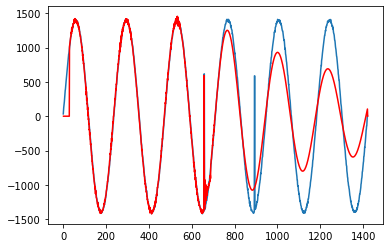

In [32]:
#plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

# Determine Seasonality

**WHY do this??**

If we know the seasonality, we can perform the right kind of differencing operation on the Time series to stationarize it. 
Maybe it will make the TS simpler to model and a simpler model will make the outliers stand out more in the model.

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose

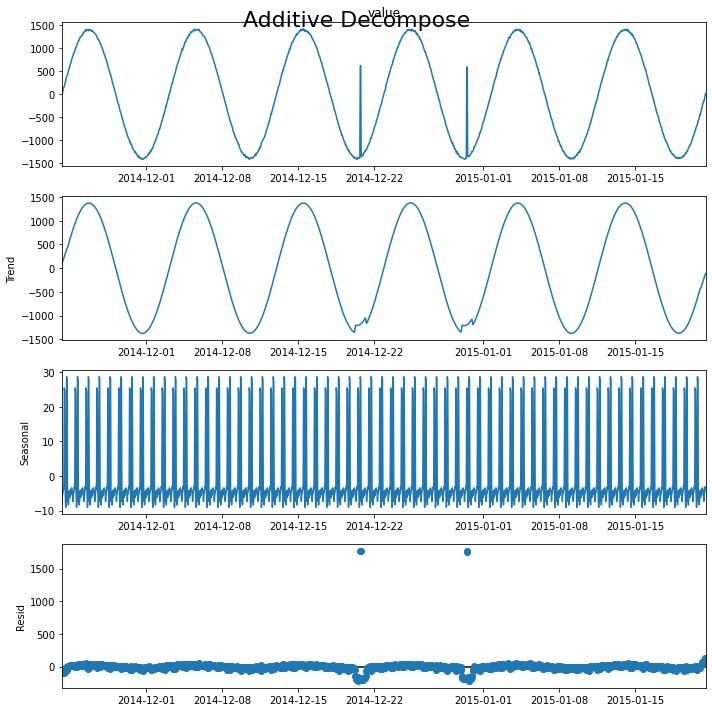

In [34]:
df_indexed = series.copy().set_index('timestamp')

# Additive Decomposition
result_add = seasonal_decompose(df_indexed['value'], model='additive', extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
#result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()


# Stationarize Time Series acc to Seasonality

In [35]:
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset.iloc[i] - dataset.iloc[i - interval]
		diff.append(value)
	return pd.Series(diff)

In [36]:
stTS

NameError: name 'stTS' is not defined

In [ ]:
interval = 1
stTS = difference(series['value'],interval)
plt.plot_date(series['timestamp'][interval:],stTS)
plt.gcf().autofmt_xdate()

Even thought the seasonality may be 7, 30, 365 days, differencing with lag = 1 is the most effective.

We can see that the outliers really stand out right now.

# Test Stationarity using the Augmented Dicky Fuller Test

In [ ]:
from statsmodels.tsa.stattools import adfuller
X = stTS
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

The mode negative this number, 

# Define threshold

Manually at the moment.

In [ ]:
stTS

In [ ]:
stTS.mean(), stTS.median(), stTS.mode()

Very obvious outliers, let's try setting the threshold manually for now to 500

In [ ]:
threshold = 500

can also try the z score, or the inter quartile range method or the n std deviations method

# See if AR model + threshold = Anomalies

# Calculate F1 score

$$ F_1 = 2 * \frac{precision + recall}{precision * recall} $$